**Property Price Prediction (House Price Estimation)**

**1. Problem Statement**


Property prices are influenced by multiple factors such as house size, location, age, and overall condition. Accurately estimating property prices is important for buyers, sellers, real estate companies, and financial institutions. Manual estimation often leads to incorrect pricing and poor decision-making


**Objectives of the Project**

**· Understand property price patterns
· Perform basic data preprocessing
· Conduct minimal but meaningful Exploratory Data Analysis (EDA)
· Build regression-based machine learning models
· Evaluate model performance using regression metrics
· Identify key price-influencing featur**

In [66]:
#loading dataset

from google.colab import files
uploaded=files.upload()

Saving train.csv to train (3).csv


In [67]:
import pandas as pd
df=pd.read_csv("train.csv")
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [68]:
df.shape

(1460, 81)

In [69]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1455,False
1456,False
1457,False
1458,False


In [70]:
df.drop_duplicates(inplace=True)

In [71]:
df.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [72]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


**4.Exploratory Data Analysis(EDA)-Minimal Graphs**

**Graph 1:Price Distribution**

**-Understand Price Range**

**Purpose**

**-Identify skewness and outliers**

**Graph**

**Histogram-Property Price**

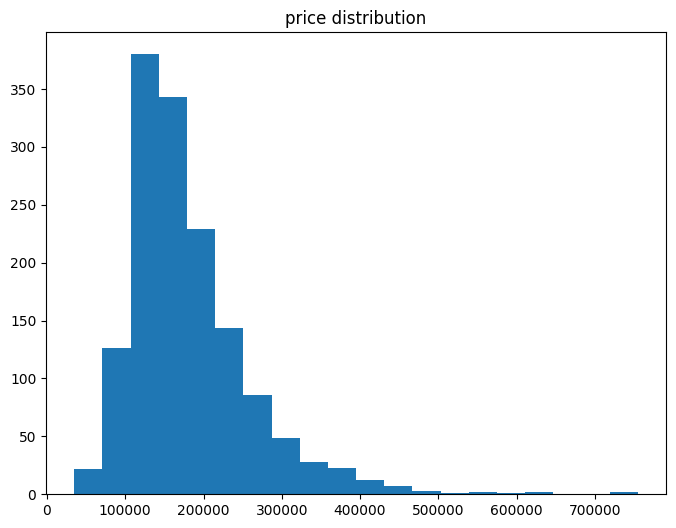

In [73]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8,6))
plt.hist(df["SalePrice"],bins=20)
plt.xlabel=("SalePrice")
plt.ylabel=("frequency")
plt.title("price distribution")
plt.show()

**Graph 2:House Size vs Price**

**Purpose**

**-Analyze relationship between size and price**

**Graph**

**Scatter Plot**

**X-axis:Size Y-axis:Price**



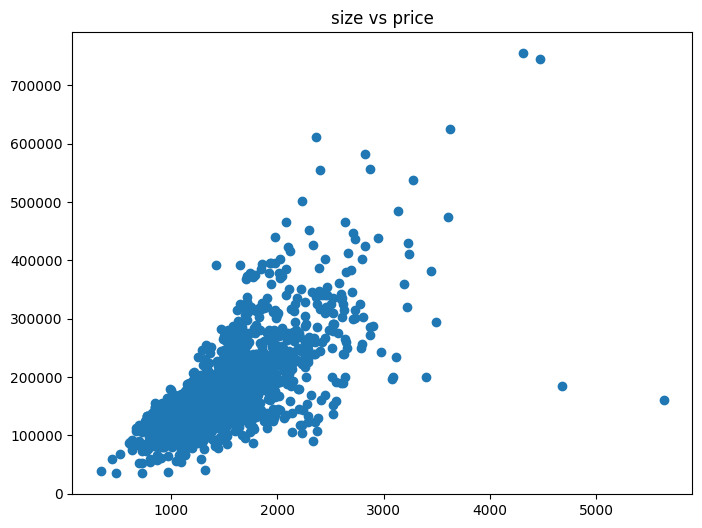

In [74]:
plt.figure(figsize=(8,6))
plt.scatter(df["GrLivArea"],df["SalePrice"])
plt.xlabel=("Size")
plt.ylabel=("Price")
plt.title("size vs price")
plt.show()

**Graph 3:Price By Location**

**Purpose**

**-Understand location-based price variation**

**Graph**

**Box-Plot X-axis:Location Y-axis:Price**

<Figure size 1000x600 with 0 Axes>

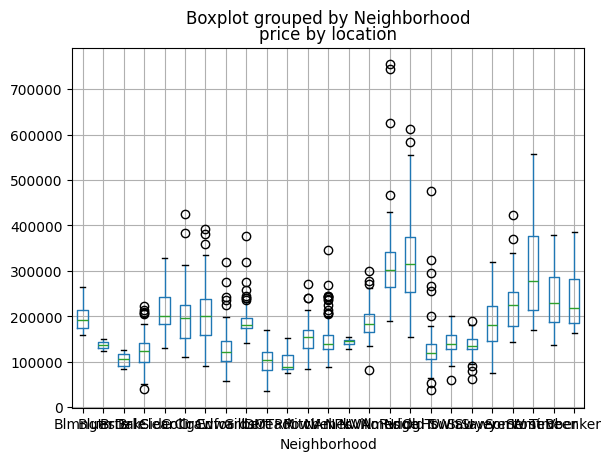

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
df.boxplot(column="SalePrice",by="Neighborhood")
plt.xlabel=("Location")
plt.ylabel=("Price")
plt.title("price by location")
plt.show()

**Graph 4:Property Age Vs Price**



**Purpose**

**analyze effect of property age on price**

**Graph**

**Scatter Plot X-axis:Age Y-axis:Price**

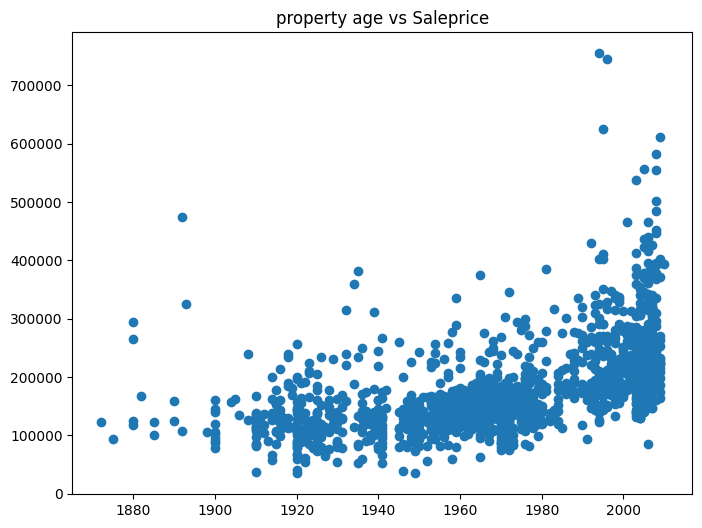

In [76]:
plt.figure(figsize=(8,6))
plt.scatter(df["YearBuilt"],df["SalePrice"])
plt.xlabel=("age")
plt.ylabel=("Price")
plt.title("property age vs Saleprice")
plt.show()

**5 Machine Learning WorkFlow**

In [77]:
#handling Numerical column
num_cols=['LotFrontage']
df[num_cols]=df[num_cols].fillna(df[num_cols].median())
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [82]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Condition2']=le.fit_transform(df['Condition2'])
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [85]:
#one hot Encoding

df=pd.get_dummies(
    df,
    columns=['Neighborhood','Condition1'],
    drop_first=True
)
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... Neighborhood_Timber

In [88]:
X=df[['LotFrontage','LotArea','OverallCond']]
y=df['SalePrice']

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)

**6 Models Used**

**Linear Regression**

In [90]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [91]:
predicted_price=model.predict(X_test)
print("predicted price",predicted_price)

predicted price [167310.61260618 214049.7290571  162973.83209259 146902.06159524
 205977.49727693 117370.27989743 172212.35700962 125924.12695763
 118004.87218167 172240.90770695 150741.7973901  170246.26234805
 248643.80565537 183114.50731027 179109.75420036 168474.68881073
 172377.39243018 169726.9527037  169408.56873846 185816.25514374
 209735.34600297 186437.80040883 174929.40500557 172107.22220753
 179471.56642603 164884.945969   184296.4902556  265806.6666912
 214026.29519354 151673.63420543 187888.85778114 198741.52726114
 257796.54920419 170831.73701945 233800.67326201 187283.43325656
 173324.09196071 175310.56486999 179482.15678614 186723.840055
 155100.41769241 180274.83711322 173537.79269894 214688.59949157
 181793.58044516 207133.61360031 175738.78438694 166790.52366987
 214793.72270339 192776.38043235 160025.7672418  181613.89813546
 166979.16097876 185279.66161607 173940.32267147 193205.62150551
 186889.85828322 185440.80527477 203727.78667482 160025.7672418
 163209.32228

**Decision Tree**

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [93]:
model=DecisionTreeClassifier(criterion='gini',max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [94]:
y_pred=model.predict(X)
print("Prediction",y_pred)

Prediction [140000 135000 190000 ... 135000 135000 135000]


In [95]:
accuracy=accuracy_score(y,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.023972602739726026


**Random Forest**

In [96]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [97]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [98]:
rf=RandomForestClassifier(
    n_estimators=100,
    bootstrap=True,
    random_state=42
)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [99]:
y_pred=rf.predict(X)
print("Prediction",y_pred)

Prediction [179000 140000 223500 ... 266500 142125 147500]


In [100]:
accuracy=accuracy_score(y,y_pred)
print("Accuracy",accuracy)

Accuracy 0.7253424657534246


**7 Model Evolution**

In [101]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

In [102]:
#RMSE

rmse=np.sqrt(mean_squared_error(y,y_pred))
print("Rmse",rmse)

#R2

r2=r2_score(y,y_pred)
print("R2_score",r2)

Rmse 41089.11761177628
R2_score 0.7323018580270236


**8 Identifying Price Influencing-Factors**

In [108]:
#Identifing Price Influencing-Factors

importances  = rf.feature_importances_
features = X.columns

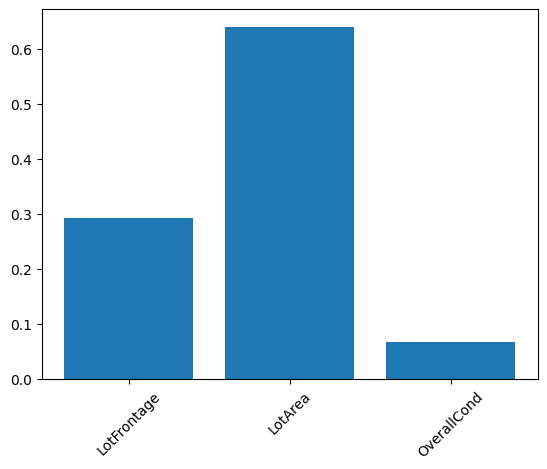

In [109]:
import matplotlib.pyplot as plt
plt.figure()
plt.bar(features,importances)
plt.xlabel=("Features Importance-Random Forest")
plt.ylabel=("Importances Score")
plt.xticks(rotation=45)
plt.show()